# Lending Club Dataset Analysis

LendingClub is the world's largest peer-to-peer lending platform, where investors provide funds for potential borrowers and investors earn a profit.
This notebook is to analyze the lending club dataset from 2007 to 2015. I am trying to explore the data and find valuable information from business perspetive and risk perspective.

## Outlier
### Distributions and Basic Information
 Summary: 
 1. Most of loans were issused with a interest rate beteen %7 to 16%
 2. Most of loans were issued with the number between 10000 to 20000 USD dollars
 3. Both of issued loan numbers and loan amount were having exponentially increasing along the year
 4. From 2007-2015, bad loans consist 17.5% of total loans,this percentage is subjected to possible changes.
 5. The reason that clients applied the most for a loan was to consolidate debt and credit cards.
 6. Clients applied less for educational purposes for all three income categories.
 7. Wedding and Cars have the highest ratio of good loans

### Business Pespective
#### Analysis by State
Summary:
 1. DC,NJ,CT,MD,VA are the states having the highest average annual income. DC meanwhile has a relatively low loan amount and interest rate, the reason might be the high annual income. 
 2. CA,TX,NY,FL,IL are the states having the highest loan amount applied. The annual income are all above average and that may be the reason why most loans were issued there.
 
#### Analysis by Income and Employment Length Categories
Summary:
 3. Hign income people's top loan purpose is small business;
    Medium income people's top loan purpose is home improvement;
    Low income people's top loan purpose is education.
 4. Junior level people have a high weight loan on education, it might because junior people were still paying for the student loan.
    Senior level people have a high weight loan on vacation and renewable_energy except people with 10+ employment length has the highest weight loan on home improvent.
    
### Risk Perspective
  Summary
  1. Low income group tends to have higher bad_loan/good_loan ratio
  2. People having small business loan purpose tend to have a higher risk of being a bad loan
  3. The interest rate for house is hign, and the bad_loan/good_loan ratio is not high, so it seems a good business to provide loan for house
  
Please check the details:


In [8]:
# Read in data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from create_table import *

In [ ]:
df = data_processing('loan.csv')

##  Distributions and Basic Information
#### We will start with exploring the basic information about the dataset, to do so, I will try to solve the following questions:
     1. What is the distribution of loan amounts?
     2. What is the distribution of interest rate?
     3. What is the total loan amounts for each year?
     4. What is the distribution of the number of issued loans for each year?
#### As follow up questions, we may also want to know:
     1. What amout was mostly issued to the borrowers?
     2. What interest rate was mostly issued to the borrowers?
     3. Which year had the most loan amount?   
#### Summary:
     According to the distribution, we found that :
     1. Most of loans were issused with a interest rate beteen %7 to 16%
     2. Most of loans were issued with the number between 10000 to 20000 USD dollars
     3. Both of issued loan numbers and loan amount were having exponentially increasing along the year


Text(0.5, 1.0, 'Average interest rate by year')

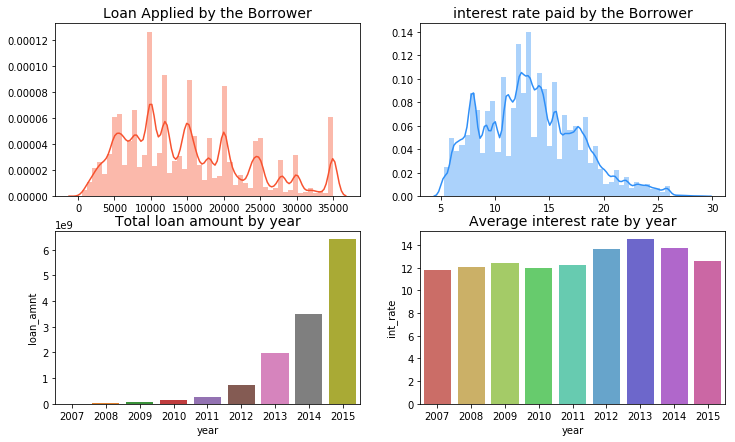

In [91]:
fig, ax = plt.subplots(2, 2, figsize=(12,7))

loan_amount = df["loan_amnt"].values
interest_rate = df["int_rate"].values
df_year = df.groupby('year')['loan_amnt'].sum().reset_index()
df_int_rate = df.groupby('year')['int_rate'].mean().reset_index()

sns.distplot(loan_amount, ax=ax[0,0], color="#F7522F")
ax[0,0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(interest_rate, ax=ax[0,1], color="#2F8FF7")
ax[0,1].set_title("interest rate paid by the Borrower", fontsize=14)

sns.barplot(x="year", y="loan_amnt", data=df_year,ax=ax[1,0])
ax[1,0].set_title("Total loan amount by year", fontsize=14)
sns.barplot(x="year", y="int_rate",data=df_int_rate,ax=ax[1,1],palette='hls')
ax[1,1].set_title("Average interest rate by year", fontsize=14)

#### We also would like to explore the loan status and loan purpose information, and in this part, we will refine the loan status to three new categories: Good Loan, Bad Loan, Current. Here are a few questions:
     1. What is the distribution of loan status?
     2. What is the distribution of loan purpose?
     3. What is the cross relationship between loan status and loan purpose?
#### Summary
     1.From 2007-2015, bad loans consist 17.5% of total loans,this percentage is subjected to possible changes.
     2.The reason that clients applied the most for a loan was to consolidate debt and credit cards.
     3.Clients applied less for educational purposes for all three income categories.
     4.Wedding and Cars have the highest ratio of good loans   

In [57]:
# Add a column to define good loan and bad loan
bad_loan = ["Charged Off", "Default", "Late (16-30 days)", "Late (31-120 days)",
            "Does not meet the credit policy. Status:Charged Off", "In Grace Period"]
good_loan = ['Fully Paid','Does not meet the credit policy. Status:Fully Paid']
current = ['Current']
df['loan_condition'] = df['loan_status']
df.loc[df['loan_status'].isin(good_loan),'loan_condition'] = 'Good Loan'
df.loc[df['loan_status'].isin(bad_loan),'loan_condition'] = 'Bad Loan'

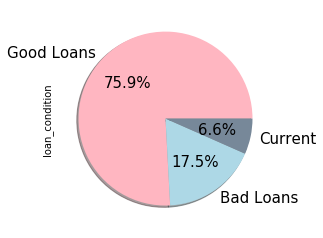

In [85]:
import random
import matplotlib.colors as mcolors
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 3)
labels =["Good Loans", "Bad Loans","Current"]
df["loan_condition"].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, 
                                             labels=labels, fontsize=15, startangle=0)

[Text(0, 0.5, '(%)')]

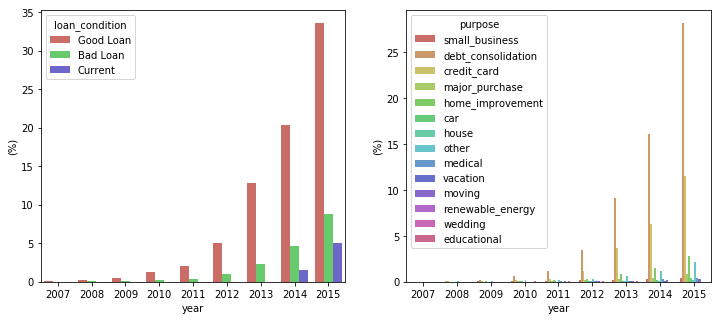

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
df_state = df.groupby('addr_state')['loan_amnt'].sum().reset_index()

sns.barplot(x="year", y="loan_amnt", hue="loan_condition", ax=ax[0],data=df, palette='hls', estimator=lambda x: len(x) / len(df) * 100)
ax[0].set(ylabel="(%)")
sns.barplot(x="year", y="loan_amnt", hue="purpose", ax=ax[1],data=df, palette='hls', estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")

In [96]:
lst= ['purpose', 'loan_condition']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[lst[0]], df[lst[1]], 
                   normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

loan_condition,Bad Loan,Current,Good Loan
purpose,,,
car,0.75,0.56,1.1
credit_card,19.36,25.87,23.9
debt_consolidation,62.8,61.71,57.98
educational,0.06,0,0.05
home_improvement,5.26,5.72,5.99
house,0.48,0.22,0.42
major_purchase,1.74,1.52,2.03
medical,1.04,0.55,0.98
moving,0.72,0.25,0.62


In [95]:
(round(pd.crosstab(df[lst[1]], df[lst[0]], 
                   normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_condition,,,,,,,,,,,,,,
Bad Loan,13.13,14.61,18.64,20.8,15.79,20.31,15.66,18.98,20.81,19.02,21.57,26.42,17.1,12.4
Current,3.68,7.36,6.91,0,6.47,3.56,5.18,3.81,2.71,3.83,2.43,3.65,1.58,0
Good Loan,83.19,78.03,74.45,79.2,77.74,76.13,79.16,77.22,76.47,77.15,76,69.93,81.31,87.6


##  Business Perspective
#### In this part, we would like to bring in loans issued state as an important key of our analysis, and explore some business perspective information
#### Summary
     1. DC,NJ,CT,MD,VA are the states having the highest average annual income. DC meanwhile has a relatively low loan amount           and interest rate, the reason might be the high annual income. 
     2. CA,TX,NY,FL,IL are the states having the highest loan amount applied. The annual income are all above average and that         may be the reason why most loans were issued there.
     3. Hign income people's top loan purpose is small business;
        Medium income people's top loan purpose is home improvement;
        Low income people's top loan purpose is education.
     4. Junior level people have a high weight loan on education, it might because junior people were still paying for the             student loan.
        Senior level people have a high weight loan on vacation and renewable_energy except people with 10+ employment length           has the highest weight on home improvent.   

### Analysis by State

In [145]:
#group by addr_state
loan_amount_sum=df.groupby(['addr_state'], as_index=False)['loan_amnt'].sum()
interest_rate_average=df.groupby(['addr_state'], as_index=False)['int_rate'].mean()
income_average=df.groupby(['addr_state'], as_index=False)['annual_inc'].mean()
dti_average=df.groupby(['addr_state'], as_index=False)['dti'].mean()
#join the dataframes
metric_state=pd.merge(loan_amount_sum,interest_rate_average,on='addr_state')
metric_state=pd.merge(metric_state,income_average,on='addr_state')
metric_state=metric_state.round(decimals=2)
metric_state.sort_values(by=['loan_amnt'],ascending=False).head(5)

,addr_state,loan_amnt,int_rate,annual_inc
4,CA,1898277950,13.16,79292.66
43,TX,1109142950,13.16,80470.21
34,NY,1076978700,13.33,78294.02
9,FL,849083625,13.27,70291.56
14,IL,539072900,13.09,76897.92


In [146]:
metric_state.sort_values(by=['annual_inc'],ascending=False).head(5)

,addr_state,loan_amnt,int_rate,annual_inc
7,DC,36892850,12.75,88072.58
31,NJ,515266750,13.15,85157.77
6,CT,202985850,13.07,84478.82
20,MD,325481975,13.38,82295.97
45,VA,411257050,13.28,80936.52


### Analysis by Income and Emplyment Length Categories

In [253]:
# set income categories:Low Income, Medium Income, High Income
# $60000 is the averge salary in US, if annual_inc < 60000, it is a Low Income, if annual_inc betweens 60000 to 200000, it is a Medium Income
# If annual_inc > 2000000, it is a Hign Income
df.loc[df['annual_inc']<60000,'income_category']='Low Income'
df.loc[df['annual_inc']>200000,'income_category']='High Income'
df.loc[(df['annual_inc']>=60000)&(df['annual_inc']<=200000),'income_category']='Medium Income'

In [254]:
lst= ['income_category', 'purpose']
(round(pd.crosstab(df[lst[0]], df[lst[1]],
                   normalize='columns') * 100,3)).style.background_gradient(axis=1)

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
income_category,,,,,,,,,,,,,,
High Income,1.343,1.855,1.601,0.473,4.231,3.345,2.315,1.862,1.865,2.059,1.913,4.75,1.056,1.491
Low Income,52.55,42.957,43.094,69.267,31.969,40.356,43.439,47.559,54.294,51,48.174,34.12,50.887,47.678
Medium Income,46.108,55.188,55.305,30.26,63.8,56.299,54.246,50.58,43.841,46.941,49.913,61.129,48.057,50.831


In [170]:
lst= ['emp_length', 'purpose']
cm = sns.light_palette("Green", as_cmap=True)
(round(pd.crosstab(df[lst[0]], df[lst[1]],
                   normalize='columns') * 100,10)).style.background_gradient(cmap = cm,axis=1)

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
emp_length,,,,,,,,,,,,,,
1 year,8.19323,7.16799,6.60959,16.1836,5.344,7.47191,7.31201,7.16264,10.4685,7.13876,5.33088,7.66568,6.16049,9.84881
10+ years,26.9832,33.3188,35.4728,11.3527,39.9377,26.1517,28.5461,33.4718,19.3099,33.7546,33.4559,27.3492,35.1216,15.4644
2 years,10.7033,9.74758,9.12552,14.2512,8.16238,11.9382,10.9558,10.3978,11.9388,9.54161,8.63971,10.8309,9.2521,13.1749
3 years,9.17594,8.54958,8.12387,8.45411,7.66963,9.32584,10.0647,8.63545,9.7824,8.28784,9.55882,10.3561,7.68356,12.8726
4 years,7.39995,6.22795,6.12237,8.9372,6.0821,7.44382,7.28149,6.24371,6.90061,6.38351,8.27206,7.66568,6.52421,8.7257
5 years,7.66043,6.55514,6.47373,7.72947,6.87999,8.51124,7.70874,6.52064,6.74378,6.7898,4.96324,7.77448,7.95635,10.4536
6 years,5.70684,5.0038,5.0905,2.657,5.17906,5.58989,5.56641,5.01007,4.68536,5.0425,4.59559,5.56874,5.31939,6.73866
7 years,4.98461,5.19816,5.38003,2.657,5.24504,5.53371,4.92554,5.46324,3.66595,5.00511,6.61765,5.5094,6.06956,4.57883
8 years,4.35709,5.06072,5.32081,2.89855,5.52337,4.46629,4.49829,5.32477,4.19526,5.07739,5.88235,5.00495,5.68311,3.45572


## Risk Perspective
#### In this part, we would like to bring in loan condition as an important key and explore some risk perspective information
#### Summary
     1. Low income group tends to have higher bad_loan/good_loan ratio
     2. People having small business loan purpose tend to have a higher risk of being a bad loan
     3. The interest rate for house is hign, and the bad_loan/good_loan ratio is not high, so it seems a good business to provide loan for house

In [261]:
#groupby income category and purpose
income_purpose_mean = df.groupby(['income_category', 'purpose'], as_index=False)['int_rate'].mean()
dti_purpose_mean = df.groupby(['income_category', 'purpose'], as_index=False)['loan_amnt'].mean()
loan_a = dti_purpose_mean['loan_amnt'].values
metric_risk=pd.merge(income_purpose_mean,dti_purpose_mean,on=['income_category','purpose'])

#add loan condition information
group_loan_condition=df.groupby(['income_category', 'purpose'])['loan_condition'].apply(lambda x: x.value_counts()).reset_index()
good_loan_count=group_loan_condition.loc[group_loan_condition['level_2']=='Good Loan']
bad_loan_count=group_loan_condition.loc[group_loan_condition['level_2']=='Bad Loan']
metric_risk['good_count']=good_loan_count['loan_condition'].values
metric_risk['bad_count']=bad_loan_count['loan_condition'].values
metric_risk['bad/good']=(bad_loan_count['loan_condition'].values)/(good_loan_count['loan_condition'].values)
metric_risk.style.background_gradient()


,income_category,purpose,int_rate,loan_amnt,good_count,bad_count,bad/good
0,High Income,car,10.3261,15669.5,98,13,0.132653
1,High Income,credit_card,10.6067,26007.8,3177,332,0.104501
2,High Income,debt_consolidation,12.4674,25287.2,6610,1061,0.160514
3,High Income,educational,11.42,11000,1,1,1
4,High Income,home_improvement,12.2257,24097.8,1771,254,0.143422
5,High Income,house,16.4604,25617.7,105,14,0.133333
6,High Income,major_purchase,12.4163,22087.6,314,46,0.146497
7,High Income,medical,14.2493,17861.8,129,25,0.193798
8,High Income,moving,15.1508,18868.6,84,14,0.166667
9,High Income,other,14.3562,21433.8,706,113,0.160057
